# Projeto 1
## Introdução a Data Science
### Alunos
Gabriel de Melo Evangelista (gme@cin.ufpe.br)

Maria Luísa Leandro de Lima (mlll@cin.ufpe.br)
### Tema: Powerlifting
https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html

- Comparação: ~~Pesos levantados por homem/mulher~~, ~~raw/singleply~~, grupos de idade

- ~~ver a diferença de performance de uma pessoa com os anos~~

- ~~discretizar os pesos corporais e idade~~

- ~~ver se tem impacto ser tested ou n~~

- ~~ajeitar a idade bugada pra zero~~
  
- Criar um plot com o peso levantado com melhores dos equipamentos, separando por idade


RUSSEL ORHII

### Imports

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
import matplotlib

### 1. Coleta de dados

In [3]:
df = pd.read_csv('openpowerlifting.csv')

C:\Users\lu-lu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [5]:
df.shape

(2744390, 41)

Observamos que os dados tem cerca de 2.7 milhões de entradas com 41 colunas.

In [6]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

A coluna de "Event" indica 

In [7]:
df['Event'].value_counts()

SBD    1886059
B       627304
D       157510
BD       53965
S        14886
SB        2876
SD        1790
Name: Event, dtype: int64

In [8]:
df['Equipment'].value_counts()

Single-ply    1312406
Raw           1127258
Wraps          177562
Multi-ply      119583
Unlimited        7535
Straps             46
Name: Equipment, dtype: int64

In [9]:
df[~df['Place'].str.isnumeric()]['Place'].value_counts()

DQ    173956
NS     14671
G       7461
DD      1506
Name: Place, dtype: int64

In [10]:
df = df[(df['Place'].str.isnumeric()) & (df['Event']=='SBD') & (df['Equipment'].isin(['Single-ply', 'Raw']))]

In [11]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


### 2. Pré-processamento dos dados

#### 2.1 Análise

In [12]:
df.dtypes

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation    

In [13]:
types = df.dtypes
columns = pd.DataFrame(df.columns)

In [14]:
df['Sex'] = df['Sex'].astype('category')
df['Equipment'] = df['Equipment'].astype('category')
df['Division'] = df['Division'].astype('category')
df['WeightClassKg'] = df['WeightClassKg'].astype('category')
df['Place'] = df['Place'].astype('category')
df['Name'] = df['Name'].astype('category')
df['Tested'] = df['Tested'].astype('category')

In [15]:
df['Sex'] = df['Sex'].cat.codes
df['EquipmentC'] = df['Equipment'].cat.codes
df['DivisionC'] = df['Division'].cat.codes
df['WeightClassKgC'] = df['WeightClassKg'].cat.codes
df['PlaceC'] = df['Place'].cat.codes
df['NameC'] = df['Name'].cat.codes
df['TestedC'] = df['Tested'].cat.codes

In [16]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,MeetCountry,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC
0,Alona Vladi,0,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Russia,NaN,Bryansk,Open Tournament,0,1865,138,0,23976,0
1,Galina Solovyanova,0,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Russia,NaN,Bryansk,Open Tournament,0,1196,189,0,165932,0
2,Daniil Voronin,1,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Russia,NaN,Bryansk,Open Tournament,0,2171,189,0,114094,0
3,Aleksey Krasov,1,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Russia,NaN,Bryansk,Open Tournament,0,1865,189,0,15365,0
4,Margarita Pleschenkova,1,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Russia,NaN,Bryansk,Open Tournament,0,1865,189,0,300972,0


In [17]:
df.isna().sum(axis=0)

Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                  726249
AgeClass             551205
BirthYearClass       681413
Division               1173
BodyweightKg          11885
WeightClassKg          8586
Squat1Kg             989817
Squat2Kg             994541
Squat3Kg            1007495
Squat4Kg            1519175
Best3SquatKg           9331
Bench1Kg             989986
Bench2Kg             993814
Bench3Kg            1007523
Bench4Kg            1519683
Best3BenchKg           9315
Deadlift1Kg          989600
Deadlift2Kg          996298
Deadlift3Kg         1015185
Deadlift4Kg         1516988
Best3DeadliftKg        9277
TotalKg                   0
Place                     0
Dots                  11885
Wilks                 11885
Glossbrenner          11885
Goodlift              12790
Tested               244023
Country              799232
State               1213230
Federation                0
ParentFederation    

In [18]:
dfnaclean = df.dropna(thresh=0.7*len(df), axis=1)
dfnaclean['Age'] = df['Age']

<ipython-input-18-f8eb11064e68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean['Age'] = df['Age']


In [19]:
dfnaclean.isnull().sum()

Name                    0
Sex                     0
Event                   0
Equipment               0
Division             1173
BodyweightKg        11885
WeightClassKg        8586
Best3SquatKg         9331
Best3BenchKg         9315
Best3DeadliftKg      9277
TotalKg                 0
Place                   0
Dots                11885
Wilks               11885
Glossbrenner        11885
Goodlift            12790
Tested             244023
Federation              0
Date                    0
MeetCountry             0
MeetState          321016
MeetTown           195186
MeetName                0
EquipmentC              0
DivisionC               0
WeightClassKgC          0
PlaceC                  0
NameC                   0
TestedC                 0
Age                726249
dtype: int64

In [20]:
dfnaclean.head()

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC,Age
0,Alona Vladi,0,SBD,Raw,O,58.30,60,80.0,60.0,107.5,...,NaN,Bryansk,Open Tournament,0,1865,138,0,23976,0,33.0
1,Galina Solovyanova,0,SBD,Raw,M1,73.10,75,105.0,67.5,110.0,...,NaN,Bryansk,Open Tournament,0,1196,189,0,165932,0,43.0
2,Daniil Voronin,1,SBD,Raw,T,67.40,75,100.0,62.5,105.0,...,NaN,Bryansk,Open Tournament,0,2171,189,0,114094,0,15.5
3,Aleksey Krasov,1,SBD,Raw,O,66.65,75,137.5,122.5,170.0,...,NaN,Bryansk,Open Tournament,0,1865,189,0,15365,0,35.0
4,Margarita Pleschenkova,1,SBD,Raw,O,72.45,75,90.0,50.0,125.0,...,NaN,Bryansk,Open Tournament,0,1865,189,0,300972,0,26.5


In [21]:
dfnaclean[dfnaclean.duplicated()]

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC,Age
4340,Alexis Carvalho,1,SBD,Raw,Open,81.80,82.5,220.00,157.50,250.00,...,NaN,NaN,Campeonato Nacional de Powerlifting,0,1868,216,0,20680,-1,22.0
81611,Kevin Gingerich,1,SBD,Raw,Open,71.94,75,154.22,115.67,183.70,...,NC,Charlotte,Junior & Senior National Powerlifting Champion...,0,1868,189,32,261685,-1,32.0
92867,Mitch Booyse,1,SBD,Raw,Juniors,53.00,53,97.50,60.00,112.50,...,NaN,Johannesburg,Gauteng Raw Powerlifting Championships,0,871,113,0,328828,0,15.5
107583,Henrik Vestergaard,1,SBD,Single-ply,Open,67.50,67.5,190.00,122.50,207.50,...,NaN,Thisted,DM A,1,1868,162,0,181733,0,33.5
113729,Kim Andersen,1,SBD,Single-ply,Open,100.00,100,280.00,180.00,300.00,...,NaN,Horsens,DM A,1,1868,2,0,263608,0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657503,Denzell Perry,1,SBD,Single-ply,Boys,94.17,99.7,156.49,115.67,165.56,...,TX,Anna,Anna High School Meet,1,156,276,98,125065,0,NaN
2657508,Victor Martinez,1,SBD,Single-ply,Boys,95.25,99.7,115.67,92.99,156.49,...,TX,Anna,Anna High School Meet,1,156,276,23,452070,0,NaN
2657532,Quinton Carroll,1,SBD,Single-ply,Boys,113.49,124.7,179.17,88.45,174.63,...,TX,Anna,Anna High School Meet,1,156,50,65,365794,0,NaN
2657534,Dario Richardson,1,SBD,Single-ply,Boys,120.47,124.7,106.59,79.38,129.27,...,TX,Anna,Anna High School Meet,1,156,50,76,115596,0,NaN


In [22]:
dfnaclean.drop_duplicates(inplace=True)

<ipython-input-22-ad91f84a674d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean.drop_duplicates(inplace=True)


In [23]:
dfnaclean[dfnaclean.duplicated()]

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC,Age


In [24]:
dfnaclean = dfnaclean.drop(['MeetState','MeetTown'], axis=1)

In [25]:
dfnaclean.shape

(1521581, 28)

#### 2.2 Inserindo dados ausentes em mais de uma coluna

In [26]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'Tested', 'Federation', 'Date', 'MeetCountry', 'MeetName', 'EquipmentC',
       'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC', 'TestedC', 'Age'],
      dtype='object')

In [27]:
incomplete_mask = ['Sex', 'EquipmentC', 'DivisionC', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'PlaceC', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']

In [28]:
df_complete = dfnaclean[incomplete_mask].dropna().sample(10000).reset_index(drop=True)
df_incomplete = df_complete.copy()

In [29]:
for x in incomplete_mask[3:]:
    df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN

<ipython-input-29-b96bc860c0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN


In [30]:
df_incomplete.isna().sum()

Sex                   0
EquipmentC            0
DivisionC             0
BodyweightKg       1000
Best3SquatKg       1000
Best3BenchKg       1000
Best3DeadliftKg    1000
TotalKg            1000
PlaceC             1000
Dots               1000
Wilks              1000
Glossbrenner       1000
Goodlift           1000
dtype: int64

In [31]:
df_incomplete.sample(10)

,Sex,EquipmentC,DivisionC,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,PlaceC,Dots,Wilks,Glossbrenner,Goodlift
4432,1,1,1727,75.00,NaN,125.00,NaN,NaN,32.0,369.47,366.97,354.58,NaN
4803,1,1,156,69.44,136.08,NaN,163.29,369.68,31.0,279.25,278.75,270.23,NaN
7926,1,1,156,100.97,147.42,86.18,161.03,394.63,28.0,NaN,239.25,228.48,41.08
4,1,0,1309,100.40,260.00,190.00,265.00,715.00,0.0,NaN,434.45,414.92,NaN
5718,0,0,1868,61.40,NaN,75.00,125.00,320.00,0.0,349.65,350.47,309.57,71.20
7606,1,0,1868,NaN,190.00,NaN,195.00,535.00,98.0,346.13,341.73,327.53,71.16
7568,1,0,1528,74.45,190.50,132.50,232.50,555.50,0.0,400.41,397.87,384.56,81.30
7007,0,1,751,52.62,95.25,43.09,NaN,231.33,65.0,279.66,285.75,NaN,46.73
4671,0,1,1868,39.90,107.50,40.00,NaN,252.50,0.0,374.91,377.66,343.49,63.23
7029,1,1,156,78.56,NaN,81.65,124.74,308.44,25.0,215.00,213.03,205.43,36.81


In [32]:
import fancyimpute as fi
df_SimpleFill = pd.DataFrame(data=fi.SimpleFill().fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
sf_mape = mse(df_SimpleFill, df_complete, multioutput='raw_values', squared=False)

In [33]:
df_KNN = pd.DataFrame(data=fi.KNN(k=5).fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
knn_mape = mse(df_KNN, df_complete, multioutput='raw_values', squared=False)

Imputing row 1/10000 with 1 missing, elapsed time: 32.251
Imputing row 101/10000 with 1 missing, elapsed time: 32.347
Imputing row 201/10000 with 2 missing, elapsed time: 32.360
Imputing row 301/10000 with 2 missing, elapsed time: 32.375
Imputing row 401/10000 with 0 missing, elapsed time: 32.390
Imputing row 501/10000 with 0 missing, elapsed time: 32.411
Imputing row 601/10000 with 4 missing, elapsed time: 32.428
Imputing row 701/10000 with 0 missing, elapsed time: 32.448
Imputing row 801/10000 with 1 missing, elapsed time: 32.466
Imputing row 901/10000 with 0 missing, elapsed time: 32.484
Imputing row 1001/10000 with 0 missing, elapsed time: 32.505
Imputing row 1101/10000 with 1 missing, elapsed time: 32.634
Imputing row 1201/10000 with 0 missing, elapsed time: 32.659
Imputing row 1301/10000 with 1 missing, elapsed time: 32.691
Imputing row 1401/10000 with 1 missing, elapsed time: 32.714
Imputing row 1501/10000 with 2 missing, elapsed time: 32.743
Imputing row 1601/10000 with 1 missi

In [34]:
df_SoftImpute = pd.DataFrame(data=fi.SoftImpute().fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
si_mape = mse(df_SoftImpute, df_complete, multioutput='raw_values', squared=False)

[SoftImpute] Max Singular Value of X_init = 151336.631317
[SoftImpute] Iter 1: observed MAE=15.532800 rank=10
[SoftImpute] Iter 2: observed MAE=15.728676 rank=8
[SoftImpute] Iter 3: observed MAE=15.730062 rank=7
[SoftImpute] Iter 4: observed MAE=15.697148 rank=7
[SoftImpute] Iter 5: observed MAE=15.577871 rank=5
[SoftImpute] Iter 6: observed MAE=14.869082 rank=4
[SoftImpute] Iter 7: observed MAE=14.484187 rank=4
[SoftImpute] Iter 8: observed MAE=14.292910 rank=4
[SoftImpute] Iter 9: observed MAE=14.192390 rank=4
[SoftImpute] Iter 10: observed MAE=14.137874 rank=4
[SoftImpute] Iter 11: observed MAE=14.107604 rank=4
[SoftImpute] Iter 12: observed MAE=14.090313 rank=4
[SoftImpute] Iter 13: observed MAE=14.080126 rank=4
[SoftImpute] Iter 14: observed MAE=14.073898 rank=4
[SoftImpute] Iter 15: observed MAE=14.070059 rank=4
[SoftImpute] Iter 16: observed MAE=14.067690 rank=4
[SoftImpute] Iter 17: observed MAE=14.066190 rank=4
[SoftImpute] Stopped after iteration 17 for lambda=3026.732626


In [35]:
df_IterativeImputer = pd.DataFrame(data=fi.IterativeImputer(max_iter=100).fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
ii_mape = mse(df_IterativeImputer, df_complete, multioutput='raw_values', squared=False)

In [36]:
pd.DataFrame({'SimpleFill': sf_mape, 'KNN': knn_mape, 'IterativeImputer': ii_mape, 'SoftImpute': sf_mape}, index=df_complete.columns)

,SimpleFill,KNN,IterativeImputer,SoftImpute
Sex,0.000000,0.000000,0.000000,0.000000
EquipmentC,0.000000,0.000000,0.000000,0.000000
DivisionC,0.000000,0.000000,0.000000,0.000000
BodyweightKg,7.158844,2.929652,2.211763,7.158844
Best3SquatKg,20.614468,4.714699,3.059037,20.614468
Best3BenchKg,14.298623,4.172279,2.508345,14.298623
Best3DeadliftKg,18.600362,5.135321,2.859641,18.600362
TotalKg,51.260529,6.275861,3.981790,51.260529
PlaceC,9.689722,9.823394,9.151636,9.689722
Dots,24.951844,4.075003,1.142337,24.951844


In [37]:
df_incomplete.describe()

,Sex,EquipmentC,DivisionC,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,PlaceC,Dots,Wilks,Glossbrenner,Goodlift
count,10000.000000,10000.000000,10000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.710300,0.623100,1148.588700,81.800754,169.436601,106.634486,184.185157,460.432080,33.385778,342.204944,340.866947,320.355832,62.314579
std,0.453646,0.484634,733.539377,22.147995,63.432149,46.408511,59.475668,163.973676,31.245360,78.611893,78.369193,76.714171,14.979844
min,0.000000,0.000000,-1.000000,35.180000,20.000000,11.340000,31.750000,63.500000,0.000000,60.820000,62.310000,61.360000,11.250000
25%,0.000000,0.000000,376.000000,65.400000,120.000000,70.000000,137.500000,330.000000,0.000000,287.400000,286.017500,266.807500,51.267500
50%,1.000000,1.000000,1168.000000,80.115000,165.000000,102.500000,182.500000,452.500000,32.000000,337.865000,337.255000,316.955000,61.840000
75%,1.000000,1.000000,1868.000000,95.620000,210.920000,137.500000,227.500000,575.000000,54.000000,394.825000,393.360000,370.942500,72.920000
max,1.000000,1.000000,2424.000000,191.500000,458.130000,355.000000,377.500000,1185.000000,113.000000,654.220000,664.840000,633.090000,113.320000


#### 2.3 Limpeza final dos dados

In [38]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'Tested', 'Federation', 'Date', 'MeetCountry', 'MeetName', 'EquipmentC',
       'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC', 'TestedC', 'Age'],
      dtype='object')

In [39]:
dfnaclean.drop(["MeetCountry", "MeetName", "Tested", "Federation", "Date"], axis = 1, inplace=True)
dfnaclean = dfnaclean[dfnaclean['Age'].notna()]

In [40]:
dfnaclean.shape

(795929, 23)

A idade é recolocada pois a diante iremos utilizá-la em nossas hipóteses

In [41]:
dfnaclean.dtypes

Name               category
Sex                    int8
Event                object
Equipment          category
Division           category
BodyweightKg        float64
WeightClassKg      category
Best3SquatKg        float64
Best3BenchKg        float64
Best3DeadliftKg     float64
TotalKg             float64
Place              category
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
EquipmentC             int8
DivisionC             int16
WeightClassKgC        int16
PlaceC                 int8
NameC                 int32
TestedC                int8
Age                 float64
dtype: object

### 3. Estatisticas descritivas dos dados e visualização

#### 3.1 Estatísticas descritivas e remoção de outliers

##### 3.1.1 Estatísticas Gerais

In [42]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'EquipmentC', 'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC',
       'TestedC', 'Age'],
      dtype='object')

In [43]:
dfnaclean.describe()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC,Age
count,795929.000000,792827.000000,794620.000000,794632.000000,794643.000000,795929.000000,792827.000000,792827.000000,792827.000000,792062.000000,795929.000000,795929.000000,795929.000000,795929.000000,795929.000000,795929.000000,795929.000000
mean,0.702151,81.888677,177.811925,115.501717,195.860997,489.093882,362.475563,361.055080,339.323178,68.589109,0.398298,1447.868428,146.851409,27.529301,244148.723227,-0.166715,28.155920
std,0.457341,21.882872,67.692854,49.551394,61.723131,173.085477,81.719113,81.382283,79.930931,14.617732,0.489548,590.131674,80.113791,29.582510,140445.832058,0.372721,12.095259
min,0.000000,17.690000,4.700000,4.000000,7.500000,24.000000,28.360000,28.230000,27.320000,4.860000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,65.790000,125.000000,75.000000,145.000000,347.500000,307.660000,306.400000,284.430000,58.920000,0.000000,885.000000,74.000000,0.000000,124911.000000,0.000000,19.500000
50%,1.000000,80.600000,175.000000,115.000000,199.600000,487.610000,360.900000,359.310000,338.230000,69.150000,0.000000,1742.000000,162.000000,32.000000,250196.000000,0.000000,24.500000
75%,1.000000,94.700000,222.500000,150.000000,240.000000,610.000000,415.510000,413.730000,392.140000,78.720000,1.000000,1868.000000,216.000000,43.000000,363371.000000,0.000000,34.000000
max,2.000000,260.000000,517.500000,435.000000,465.000000,1296.000000,731.310000,722.020000,691.990000,136.800000,1.000000,2428.000000,277.000000,119.000000,477323.000000,0.000000,95.500000


In [44]:
dfnaclean.cov()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC,Age
Sex,0.209161,4.375785,18.220006,14.799628,18.549169,51.531814,8.445373,8.235158,13.574039,1.344852,0.017974,5.845885e+01,-3.672502,1.212523,3.936411e+02,-0.003093,-0.042001
BodyweightKg,4.375785,478.860084,931.127498,709.098264,857.320169,2496.713541,354.218637,326.061876,382.242961,72.514601,-0.455890,1.144743e+03,-576.659639,-15.708917,-2.356785e+04,-0.753553,44.646678
Best3SquatKg,18.220006,931.127498,4582.322545,3047.254293,3819.691687,11448.378154,4423.123836,4347.622004,4535.010971,712.182921,8.980837,7.055366e+03,-1125.108533,33.829064,7.718776e+04,-0.566694,27.242458
Best3BenchKg,14.799628,709.098264,3047.254293,2455.340611,2687.212061,8189.124045,2882.662314,2830.098117,3029.945801,471.970809,5.153690,6.155494e+03,-899.630172,11.941061,7.740615e+04,-0.781440,60.601536
Best3DeadliftKg,18.549169,857.320169,3819.691687,2687.212061,3809.744883,10316.087231,3747.738626,3663.764752,3906.485434,667.743648,3.021355,6.801210e+03,-886.415003,-9.192529,4.701233e+04,-1.593728,58.583805
TotalKg,51.531814,2496.713541,11448.378154,8189.124045,10316.087231,29958.582358,11061.602716,10849.376632,11477.744113,1853.737282,17.118464,2.000747e+04,-2908.202597,34.922929,2.025070e+05,-2.913343,147.303150
Dots,8.445373,354.218637,4423.123836,2882.662314,3747.738626,11061.602716,6678.013355,6638.420571,6431.181343,1084.397988,12.436597,6.580511e+03,-501.403287,-71.123574,1.828707e+05,0.232783,5.816456
Wilks,8.235158,326.061876,4347.622004,2830.098117,3663.764752,10849.376632,6638.420571,6623.075917,6415.945925,1072.902565,12.644933,6.600394e+03,-628.225045,-75.534511,1.936115e+05,0.335115,-0.195747
Glossbrenner,13.574039,382.242961,4535.010971,3029.945801,3906.485434,11477.744113,6431.181343,6415.945925,6388.953651,1035.751427,12.499360,7.782822e+03,-652.342356,-34.273722,1.971513e+05,0.297307,-7.123583
Goodlift,1.344852,72.514601,712.182921,471.970809,667.743648,1853.737282,1084.397988,1072.902565,1035.751427,213.678082,-0.680318,9.439191e+02,-54.808000,-37.173770,1.151282e+03,-0.374302,6.000247


In [45]:
dfnaclean.corr()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,TestedC,Age
Sex,1.000000,0.437113,0.588408,0.652921,0.656963,0.650991,0.225911,0.221200,0.371224,0.201148,0.080282,0.216601,-0.100234,0.089622,0.006128,-0.018143,-0.007593
BodyweightKg,0.437113,1.000000,0.630406,0.655408,0.635598,0.660710,0.198081,0.183091,0.218535,0.227186,-0.042588,0.088631,-0.329415,-0.024257,-0.007666,-0.092590,0.168706
Best3SquatKg,0.588408,0.630406,1.000000,0.908472,0.914190,0.977110,0.802133,0.791694,0.840793,0.723292,0.271077,0.176625,-0.207453,0.016891,0.008118,-0.022497,0.033270
Best3BenchKg,0.652921,0.655408,0.908472,1.000000,0.878614,0.954785,0.713633,0.703512,0.766852,0.654059,0.212507,0.210510,-0.226606,0.008145,0.011122,-0.042380,0.101103
Best3DeadliftKg,0.656963,0.635598,0.914190,0.878614,1.000000,0.965626,0.744263,0.730590,0.793111,0.742972,0.100015,0.186727,-0.179249,-0.005034,0.005423,-0.069392,0.078463
TotalKg,0.650991,0.660710,0.977110,0.954785,0.965626,1.000000,0.783864,0.772007,0.831549,0.735642,0.202027,0.195877,-0.209728,0.006820,0.008330,-0.045159,0.070362
Dots,0.225911,0.198081,0.802133,0.713633,0.744263,0.783864,1.000000,0.998185,0.984583,0.910054,0.311109,0.136433,-0.076699,-0.029409,0.015929,0.007659,0.005885
Wilks,0.221200,0.183091,0.791694,0.703512,0.730590,0.772007,0.998185,1.000000,0.986316,0.903826,0.317630,0.137412,-0.096497,-0.031362,0.016935,0.011072,-0.000199
Glossbrenner,0.371224,0.218535,0.840793,0.766852,0.793111,0.831549,0.984583,0.986316,1.000000,0.888022,0.319675,0.164970,-0.102021,-0.014489,0.017557,0.010001,-0.007369
Goodlift,0.201148,0.227186,0.723292,0.654059,0.742972,0.735642,0.910054,0.903826,0.888022,1.000000,-0.095133,0.109447,-0.046860,-0.085921,0.000561,-0.068839,0.033963


##### 3.1.2 Estatísticas de Idade

In [46]:
dfcopy = dfnaclean.copy()

In [47]:
dfnaclean['Age'].describe()

count    795929.000000
mean         28.155920
std          12.095259
min           0.000000
25%          19.500000
50%          24.500000
75%          34.000000
max          95.500000
Name: Age, dtype: float64

<AxesSubplot:>

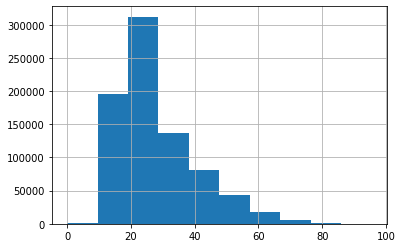

In [48]:
dfnaclean.Age.hist() # não é simetrico

<AxesSubplot:>

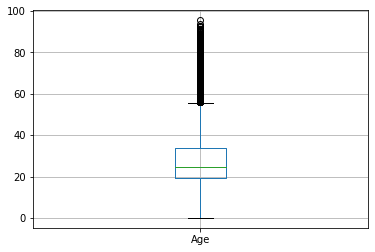

In [49]:
dfnaclean.boxplot(column=['Age'])

In [50]:
q1= dfnaclean['Age'].quantile(q=0.25)
q3= dfnaclean['Age'].quantile(q=0.75)
iqr= q3- q1
print(iqr)

14.5


In [51]:
dfnaclean.shape

(795929, 23)

In [52]:
dfnaclean = dfnaclean[(dfnaclean['Age'] < (q3 + 1.5*iqr)) 
                        &(dfnaclean['Age'] > (q1 - 1.5*iqr))]

In [53]:
dfnaclean.shape

(765751, 23)

In [54]:
dfnaclean['Age'].describe()

count    765751.000000
mean         26.778046
std          10.031060
min           0.000000
25%          19.000000
50%          24.000000
75%          32.500000
max          55.500000
Name: Age, dtype: float64

In [55]:
dfcopy['Age'].describe()

count    795929.000000
mean         28.155920
std          12.095259
min           0.000000
25%          19.500000
50%          24.500000
75%          34.000000
max          95.500000
Name: Age, dtype: float64

##### 3.1.3 Estatísticas de Peso coporal

In [56]:
dfcopy = dfnaclean.copy()

In [57]:
dfnaclean['BodyweightKg'].describe()

count    762733.000000
mean         81.860739
std          21.983755
min          17.690000
25%          65.700000
50%          80.500000
75%          94.710000
max         260.000000
Name: BodyweightKg, dtype: float64

<AxesSubplot:>

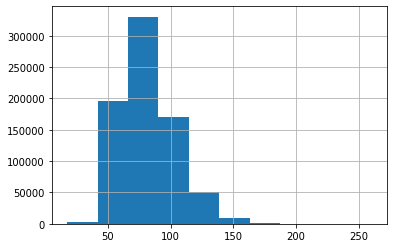

In [58]:
dfnaclean.BodyweightKg.hist()

<AxesSubplot:>

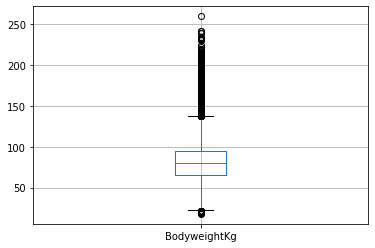

In [59]:
dfnaclean.boxplot(column=['BodyweightKg'])

In [60]:
q1= dfnaclean['BodyweightKg'].quantile(q=0.25)
q3= dfnaclean['BodyweightKg'].quantile(q=0.75)
iqr= q3- q1
print(iqr)

29.00999999999999


In [61]:
dfnaclean.shape

(765751, 23)

In [62]:
dfnaclean = dfnaclean[(dfnaclean['BodyweightKg'] < (q3 + 1.5*iqr)) 
                        &(dfnaclean['BodyweightKg'] > (q1 - 1.5*iqr))]

In [63]:
dfnaclean.shape

(750357, 23)

In [64]:
dfnaclean['BodyweightKg'].describe()

count    750357.000000
mean         80.709770
std          20.163958
min          22.230000
25%          65.500000
50%          80.100000
75%          92.950000
max         138.220000
Name: BodyweightKg, dtype: float64

In [65]:
dfcopy['BodyweightKg'].describe()

count    762733.000000
mean         81.860739
std          21.983755
min          17.690000
25%          65.700000
50%          80.500000
75%          94.710000
max         260.000000
Name: BodyweightKg, dtype: float64

##### 3.1.4 Estatísticas de peso levantado em agachamento, supino e deadlift

In [66]:
dfcopy = dfnaclean.copy()

In [67]:
dfnaclean[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].describe()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
count,749117.000000,749127.000000,749138.000000
mean,177.515122,114.946810,195.609002
std,66.317684,48.750347,61.286152
min,4.700000,4.000000,7.500000
25%,125.000000,72.570000,145.000000
50%,175.000000,115.000000,200.000000
75%,222.500000,147.500000,240.000000
max,480.000000,365.000000,465.000000


<AxesSubplot:>

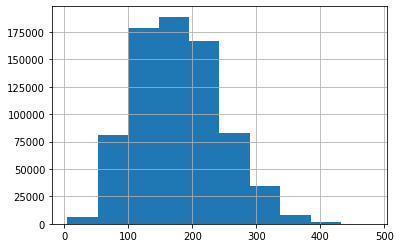

In [68]:
dfnaclean.Best3SquatKg.hist()

<AxesSubplot:>

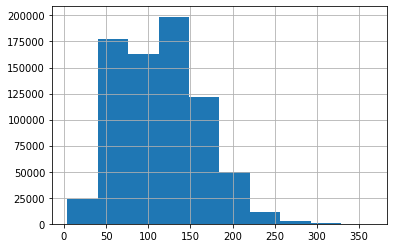

In [69]:
dfnaclean.Best3BenchKg.hist()

<AxesSubplot:>

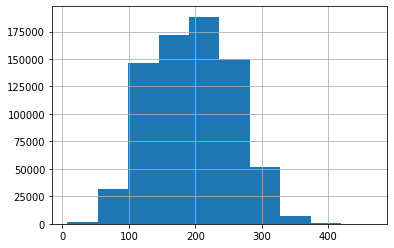

In [70]:
dfnaclean.Best3DeadliftKg.hist()

<AxesSubplot:>

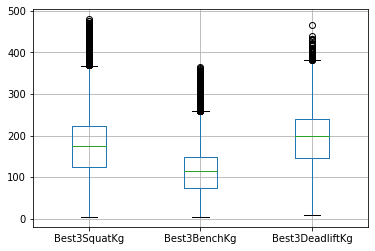

In [71]:
dfnaclean.boxplot(column=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'])

In [72]:
q1S = dfnaclean['Best3SquatKg'].quantile(q=0.25)
q3S = dfnaclean['Best3SquatKg'].quantile(q=0.75)
iqrS = q3S - q1S
print(iqrS)

97.5


In [73]:
q1B = dfnaclean['Best3BenchKg'].quantile(q=0.25)
q3B = dfnaclean['Best3BenchKg'].quantile(q=0.75)
iqrB = q3B - q1B
print(iqrB)

74.93


In [74]:
q1D = dfnaclean['Best3DeadliftKg'].quantile(q=0.25)
q3D = dfnaclean['Best3DeadliftKg'].quantile(q=0.75)
iqrD = q3D - q1D
print(iqrD)

95.0


In [75]:
dfnaclean.shape

(750357, 23)

In [76]:
dfnaclean = dfnaclean[(dfnaclean['Best3SquatKg'] < (q3S + 1.5*iqrS)) 
                        &(dfnaclean['Best3SquatKg'] > (q1S - 1.5*iqrS)) 
                    & (dfnaclean['Best3BenchKg'] < (q3B + 1.5*iqrB))
                        &(dfnaclean['Best3BenchKg'] > (q1B - 1.5*iqrB)) 
                    & (dfnaclean['Best3DeadliftKg'] < (q3D + 1.5*iqrD))
                        &(dfnaclean['Best3DeadliftKg'] > (q1D - 1.5*iqrD))]

In [77]:
dfnaclean.shape

(743955, 23)

In [78]:
dfnaclean[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].describe()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
count,743955.000000,743955.000000,743955.000000
mean,176.289536,113.964223,194.803666
std,64.700910,47.337216,60.587385
min,4.700000,4.000000,7.500000
25%,125.000000,72.500000,145.000000
50%,175.000000,112.500000,197.500000
75%,220.000000,147.500000,240.000000
max,367.500000,258.550000,381.020000


In [79]:
dfcopy[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].describe()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
count,749117.000000,749127.000000,749138.000000
mean,177.515122,114.946810,195.609002
std,66.317684,48.750347,61.286152
min,4.700000,4.000000,7.500000
25%,125.000000,72.570000,145.000000
50%,175.000000,115.000000,200.000000
75%,222.500000,147.500000,240.000000
max,480.000000,365.000000,465.000000


##### 3.1.5 Estatísticas de métricas

In [80]:
dfcopy = dfnaclean.copy()

In [81]:
dfnaclean[['Dots', 'Wilks', 'Glossbrenner', 'Goodlift']].describe()

,Dots,Wilks,Glossbrenner,Goodlift
count,743955.000000,743955.000000,743955.000000,743208.000000
mean,363.484917,361.861770,339.960722,68.864967
std,79.547443,79.027978,77.804764,14.348998
min,28.360000,28.230000,27.320000,4.860000
25%,310.180000,308.790000,286.480000,59.450000
50%,362.470000,360.700000,339.550000,69.500000
75%,415.860000,413.840000,392.250000,78.830000
max,709.210000,708.690000,666.590000,136.800000


<AxesSubplot:>

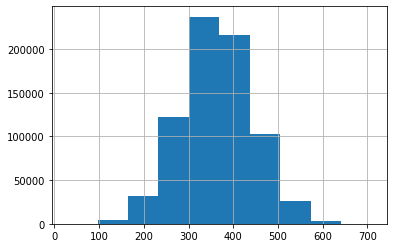

In [82]:
dfnaclean.Dots.hist()

<AxesSubplot:>

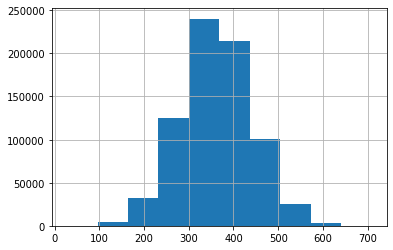

In [83]:
dfnaclean.Wilks.hist()

<AxesSubplot:>

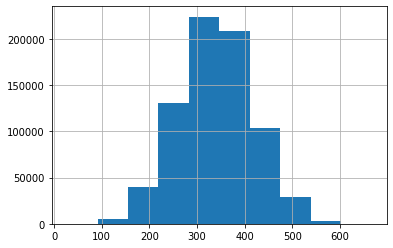

In [84]:
dfnaclean.Glossbrenner.hist()

<AxesSubplot:>

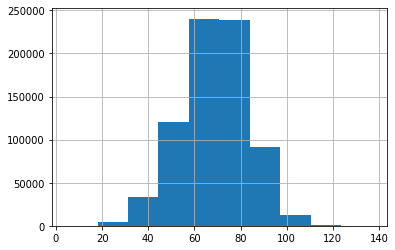

In [85]:
dfnaclean.Goodlift.hist()

<AxesSubplot:>

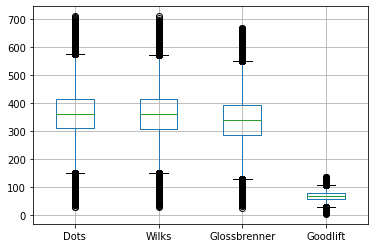

In [86]:
dfnaclean.boxplot(column=['Dots', 'Wilks', 'Glossbrenner', 'Goodlift'])

In [87]:
q1D = dfnaclean['Dots'].quantile(q=0.25)
q3D = dfnaclean['Dots'].quantile(q=0.75)
iqrD = q3D - q1D
print(iqrD)

105.68


In [88]:
q1W = dfnaclean['Wilks'].quantile(q=0.25)
q3W = dfnaclean['Wilks'].quantile(q=0.75)
iqrW = q3W - q1W
print(iqrW)

105.04999999999995


In [89]:
q1G = dfnaclean['Glossbrenner'].quantile(q=0.25)
q3G = dfnaclean['Glossbrenner'].quantile(q=0.75)
iqrG = q3G - q1G
print(iqrG)

105.76999999999998


In [90]:
q1Go = dfnaclean['Goodlift'].quantile(q=0.25)
q3Go = dfnaclean['Goodlift'].quantile(q=0.75)
iqrGo = q3Go - q1Go
print(iqrGo)

19.379999999999995


In [91]:
dfnaclean.shape

(743955, 23)

In [92]:
dfnaclean = dfnaclean[(dfnaclean['Dots'] < (q3D + 1.5*iqrD)) 
                        &(dfnaclean['Dots'] > (q1D - 1.5*iqrD)) 
                    & (dfnaclean['Wilks'] < (q3W + 1.5*iqrW))
                        &(dfnaclean['Wilks'] > (q1W - 1.5*iqrW)) 
                    & (dfnaclean['Glossbrenner'] < (q3G + 1.5*iqrG))
                        &(dfnaclean['Glossbrenner'] > (q1G - 1.5*iqrG))
                    & (dfnaclean['Goodlift'] < (q3Go + 1.5*iqrGo))
                        &(dfnaclean['Goodlift'] > (q1Go - 1.5*iqrGo))]

In [93]:
dfnaclean.shape

(734209, 23)

In [94]:
dfnaclean[['Dots', 'Wilks', 'Glossbrenner', 'Goodlift']].describe()

,Dots,Wilks,Glossbrenner,Goodlift
count,734209.000000,734209.000000,734209.000000,734209.000000
mean,363.490138,361.833644,339.973634,68.883929
std,75.978927,75.496634,74.810990,13.785258
min,151.670000,151.290000,129.020000,30.390000
25%,311.010000,309.620000,287.330000,59.580000
50%,362.500000,360.730000,339.570000,69.480000
75%,415.040000,413.030000,391.490000,78.690000
max,574.360000,571.380000,550.830000,107.890000


In [95]:
dfcopy[['Dots', 'Wilks', 'Glossbrenner', 'Goodlift']].describe()

,Dots,Wilks,Glossbrenner,Goodlift
count,743955.000000,743955.000000,743955.000000,743208.000000
mean,363.484917,361.861770,339.960722,68.864967
std,79.547443,79.027978,77.804764,14.348998
min,28.360000,28.230000,27.320000,4.860000
25%,310.180000,308.790000,286.480000,59.450000
50%,362.470000,360.700000,339.550000,69.500000
75%,415.860000,413.840000,392.250000,78.830000
max,709.210000,708.690000,666.590000,136.800000


##### 3.1.6 Evolução das pessoas com mais amostras ao longo dos anos

In [96]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'EquipmentC', 'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC',
       'TestedC', 'Age'],
      dtype='object')

In [97]:
dfnaclean['Name'].value_counts()

Jackie Blasbery      151
Karel Ruso           136
Jenny Hunter         120
Libor Novák          111
Erik Rasmussen       104
                    ... 
P. Giadino             0
P. Giaviano            0
P. Gibbs               0
Heather Rose           0
Josephine Coffman      0
Name: Name, Length: 477324, dtype: int64

In [98]:
names = dfnaclean['Name'].value_counts().index[:3]
names

CategoricalIndex(['Jackie Blasbery', 'Karel Ruso', 'Jenny Hunter'], categories=['A Abduzhabarov', 'A Abrutis', 'A Ajeesha', 'A Akins', 'A Allmehat', 'A Arlavicius', 'A Ashwin', 'A Ayvazyan', ...], ordered=False, dtype='category')

In [99]:
def person_evo(name):
    print(name)
    dfnaclean[dfnaclean['Name'] == name].plot.scatter(x='Age',y='TotalKg', s=2)
    dfnaclean[dfnaclean['Name'] == name].plot.scatter(x='Age',y='BodyweightKg', s=2)
    plt.show()
    print("##################################################")

Jackie Blasbery


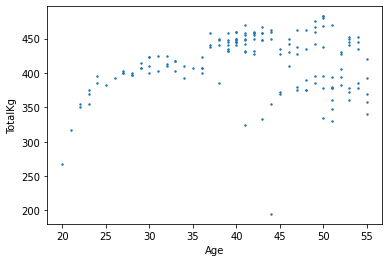

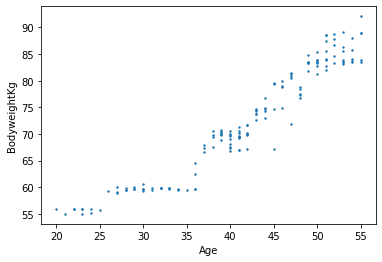

##################################################
Karel Ruso


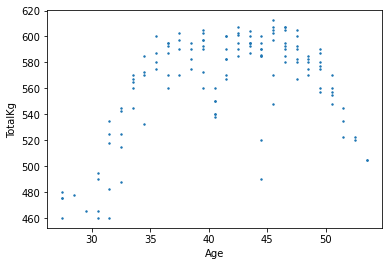

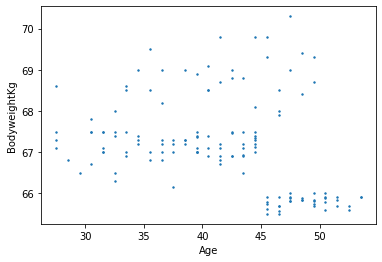

##################################################
Jenny Hunter


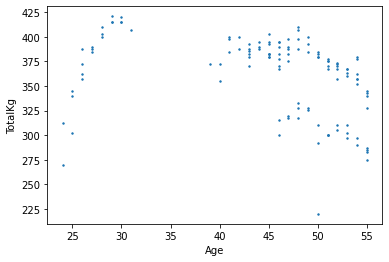

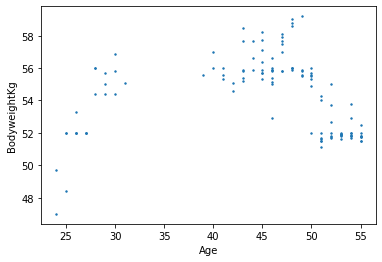

##################################################


In [100]:
for i in names:
    person_evo(i)

##### 3.1.7 Distribuição de idade por melhores pesos dos equipamentos

In [233]:
dfnaclean['Age_dist'].value_counts()

(21.5, 26.5]      151310
(-0.001, 18.0]    147699
(18.0, 21.5]      146262
(35.0, 55.5]      144707
(26.5, 35.0]      141618
Name: Age_dist, dtype: int64

In [241]:
dfnaclean['Age_dist'].cat.codes

0          3
1          4
2          0
3          3
4          2
          ..
2744384    3
2744385    4
2744386    3
2744387    4
2744388    4
Length: 731596, dtype: int8

In [242]:
label = dfnaclean['Age_dist'].cat.codes
color = ['red', 'blue', 'green', 'yellow', 'black']

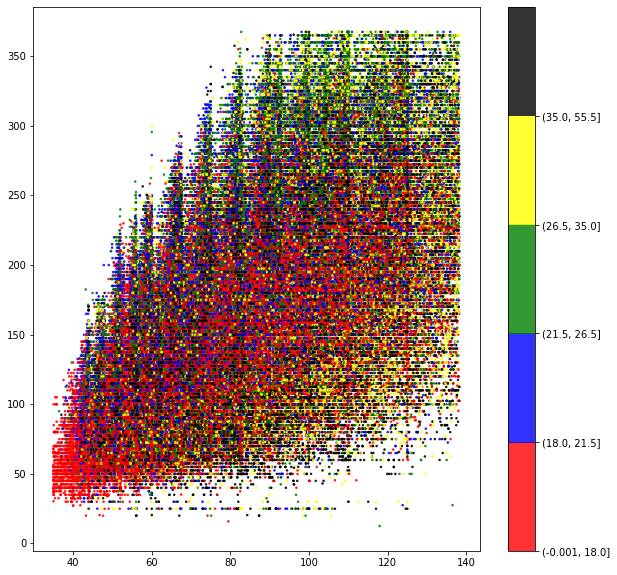

In [251]:
## peso total por peso corporal, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfnaclean['BodyweightKg'], dfnaclean['Best3SquatKg'], alpha=0.8, s=2.5,
           c=label, cmap = matplotlib.colors.ListedColormap(color))
cb = plt.colorbar()
loc = np.arange(0, max(label), max(label)/float(len(color)))
cb.set_ticks(loc)
cb.set_ticklabels(['(-0.001, 18.0]', '(18.0, 21.5]', '(21.5, 26.5]', '(26.5, 35.0]', '(35.0, 55.5]'])

#### 3.2 Removendo outliers usando razão de duas variáveis

In [101]:
dfcopy = dfnaclean.copy()

<AxesSubplot:xlabel='BodyweightKg', ylabel='TotalKg'>

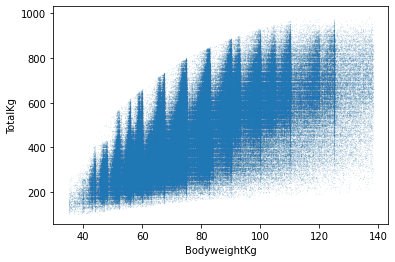

In [102]:
dfnaclean.plot.scatter(x='BodyweightKg',y='TotalKg', s=.001)

In [103]:
dfnaclean['total_bodyweight'] = dfnaclean['TotalKg']/dfnaclean['BodyweightKg']

<AxesSubplot:>

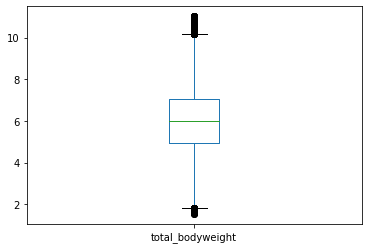

In [104]:
dfnaclean['total_bodyweight'].plot.box()

In [105]:
dfnaclean['total_bodyweight'].describe()

count    734209.000000
mean          6.030184
std           1.515980
min           1.540595
25%           4.957265
50%           6.021689
75%           7.049947
max          11.024765
Name: total_bodyweight, dtype: float64

<AxesSubplot:>

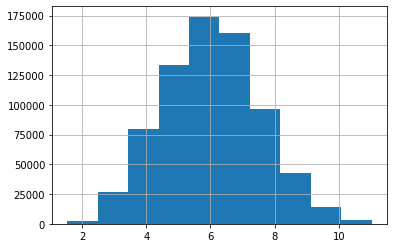

In [106]:
dfnaclean['total_bodyweight'].hist()

In [107]:
q1 = dfnaclean['total_bodyweight'].quantile(q=0.25)
q3 = dfnaclean['total_bodyweight'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

2.092682228490286


In [108]:
dfnaclean.shape

(734209, 24)

In [109]:
dfnaclean = dfnaclean[(dfnaclean['total_bodyweight'] < (q3 + 1.5*iqr)) 
                        &(dfnaclean['total_bodyweight'] > (q1 - 1.5*iqr)) 
                    ]

In [110]:
dfnaclean.shape

(731596, 24)

In [111]:
dfnaclean['total_bodyweight'].describe()

count    731596.000000
mean          6.015058
std           1.495099
min           1.821705
25%           4.953200
50%           6.015038
75%           7.037325
max          10.188934
Name: total_bodyweight, dtype: float64

#### 3.3 Testando métodos de remoção de outliers

In [113]:
codes = ['Equipment', 'Division', 'WeightClassKg', 'Place', 'Name', 'Event', 'NameC']
dfclean = dfnaclean.drop(codes, axis = 1).dropna()
dfclean.dtypes

Sex                    int8
BodyweightKg        float64
Best3SquatKg        float64
Best3BenchKg        float64
Best3DeadliftKg     float64
TotalKg             float64
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
EquipmentC             int8
DivisionC             int16
WeightClassKgC        int16
PlaceC                 int8
TestedC                int8
Age                 float64
total_bodyweight    float64
dtype: object

In [114]:
from sklearn.ensemble import IsolationForest
isolFor = IsolationForest(max_samples=100, random_state=42)
isolFor.fit(dfclean)

IsolationForest(max_samples=100, random_state=42)

In [115]:
dfclean['outlierIsol'] = isolFor.predict(dfclean)

In [116]:
dfclean[dfclean['outlierIsol'] != -1].drop('outlierIsol', axis=1).corr()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,TestedC,Age,total_bodyweight
Sex,1.000000,0.447618,0.617379,0.689259,0.682457,0.698344,0.087225,0.077558,0.326503,0.057629,0.046263,0.215171,0.002047,0.105924,-0.127952,-0.005970,0.487865
BodyweightKg,0.447618,1.000000,0.662242,0.678477,0.687628,0.714359,0.042402,-0.002155,0.070113,0.157119,-0.130321,0.122825,-0.320326,0.022866,-0.039372,0.186580,-0.180555
Best3SquatKg,0.617379,0.662242,1.000000,0.845635,0.856420,0.957196,0.639580,0.608890,0.711426,0.498500,0.210537,0.196320,-0.118782,0.051748,-0.050526,0.082992,0.548047
Best3BenchKg,0.689259,0.678477,0.845635,1.000000,0.818086,0.928859,0.513994,0.484228,0.611760,0.441180,0.112021,0.229301,-0.117602,0.048566,-0.084476,0.163010,0.491328
Best3DeadliftKg,0.682457,0.687628,0.856420,0.818086,1.000000,0.948241,0.540611,0.507542,0.631543,0.561188,-0.021859,0.192382,-0.095747,0.023408,-0.117208,0.137904,0.504491
TotalKg,0.698344,0.714359,0.957196,0.928859,0.948241,1.000000,0.601593,0.568526,0.692387,0.533735,0.105602,0.215729,-0.116488,0.043040,-0.088629,0.132061,0.546090
Dots,0.087225,0.042402,0.639580,0.513994,0.540611,0.601593,1.000000,0.996361,0.962097,0.768762,0.300469,0.123141,0.005969,-0.038219,-0.010685,0.064921,0.784232
Wilks,0.077558,-0.002155,0.608890,0.484228,0.507542,0.568526,0.996361,1.000000,0.965806,0.754612,0.311208,0.121470,-0.017662,-0.041935,-0.004968,0.053390,0.797015
Glossbrenner,0.326503,0.070113,0.711426,0.611760,0.631543,0.692387,0.962097,0.965806,1.000000,0.718674,0.313392,0.165923,-0.005925,-0.013644,-0.036210,0.039574,0.897765
Goodlift,0.057629,0.157119,0.498500,0.441180,0.561188,0.533735,0.768762,0.754612,0.718674,1.000000,-0.366995,0.059391,0.022495,-0.103812,-0.111016,0.141927,0.538602


In [141]:
dfclean = dfclean[dfclean['outlierIsol'] != -1]

#### 3.4 Discretizando peso corporal e idade

In [142]:
dfclean['BodyweightKg_dist'] = pd.qcut(dfclean['BodyweightKg'], 5)

In [143]:
dfclean['BodyweightKg_dist'].describe()

count           409933
unique               5
top       (65.5, 74.0]
freq             82426
Name: BodyweightKg_dist, dtype: object

In [144]:
dfclean['BodyweightKg_dist'].value_counts()

(65.5, 74.0]                  82426
(82.4, 92.65]                 82061
(41.599000000000004, 65.5]    82004
(92.65, 138.22]               81903
(74.0, 82.4]                  81539
Name: BodyweightKg_dist, dtype: int64

In [145]:
dfclean['Age_dist'] = pd.qcut(dfclean['Age'], 5)

In [146]:
dfclean['Age_dist'].describe()

count            409933
unique                5
top       (0.499, 18.5]
freq              89909
Name: Age_dist, dtype: object

In [147]:
dfclean['Age_dist'].value_counts()

(0.499, 18.5]    89909
(21.5, 25.5]     82538
(25.5, 32.5]     79876
(18.5, 21.5]     79515
(32.5, 55.5]     78095
Name: Age_dist, dtype: int64

### 4. Hipóteses e testes de hipótese

##### Hipótese 1

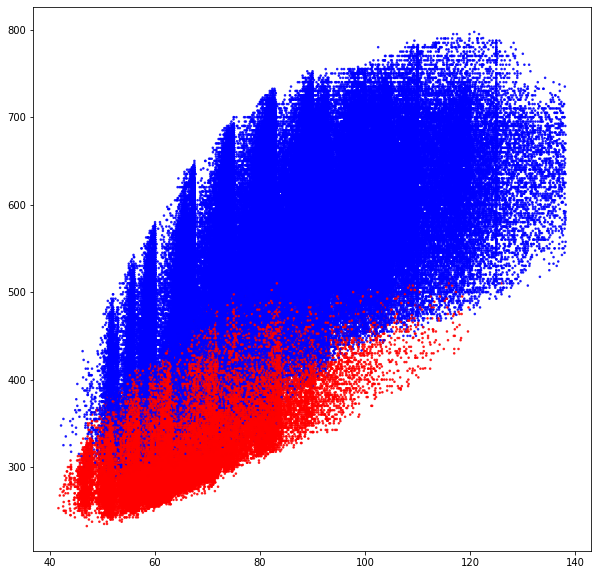

In [148]:
## peso total por peso corporal, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfclean['BodyweightKg'], dfclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfclean['Sex']])

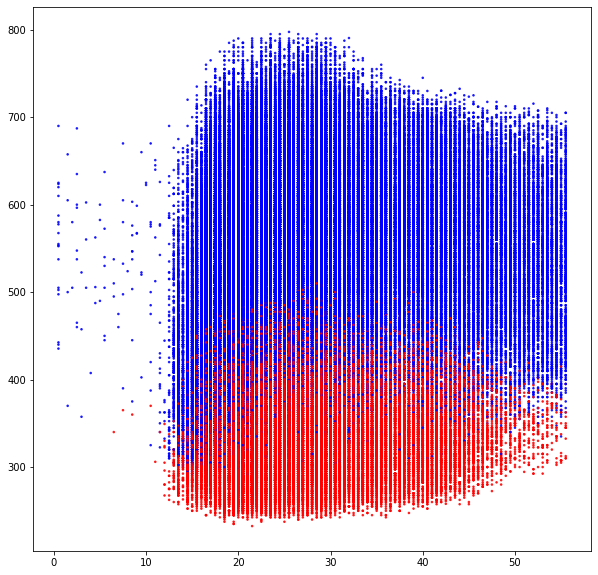

In [149]:
## peso total por idade, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfclean['Age'], dfclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfclean['Sex']])

In [209]:
def get_plot_and_stats(bincategory, column, samples=50):
    cate = dfclean[bincategory].value_counts()
    df1 = dfclean[dfclean[bincategory] == cate.index[1]]
    df0 = dfclean[dfclean[bincategory] == cate.index[0]]
    df0_sample = df0[column].sample(n=samples, random_state=53)
    df1_sample = df1[column].sample(n=samples, random_state=53)
    print("Full data histogram:")
    df0[column].hist()
    df1[column].hist()
    plt.show()
    print("#####################################################")
    print()
    print("Category 0: " + str(stats.shapiro(df0_sample)))
    print("Category 1: " + str(stats.shapiro(df1_sample)))
    print(stats.ttest_ind(df1_sample, df0_sample))
    print(stats.mannwhitneyu(df0_sample, df0_sample))
    print()
    print("#####################################################")
    print("Sampled data histogram:")
    df0_sample.hist()
    df1_sample.hist()
    plt.show()


Full data histogram:


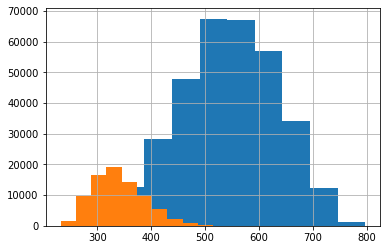

#####################################################

Category 0: ShapiroResult(statistic=0.9707527160644531, pvalue=0.24828580021858215)
Category 1: ShapiroResult(statistic=0.9671247601509094, pvalue=0.1763753443956375)
Ttest_indResult(statistic=-13.63804415179196, pvalue=2.2522883320204295e-24)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986244470746747)

#####################################################
Sampled data histogram:


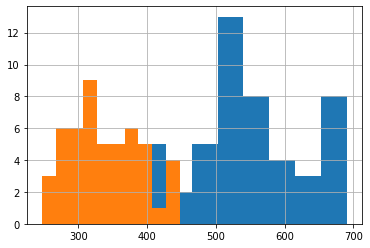

In [210]:
get_plot_and_stats('Sex', 'TotalKg')

Full data histogram:


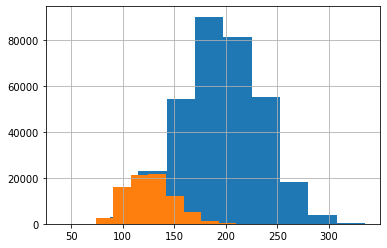

#####################################################

Category 0: ShapiroResult(statistic=0.9711067080497742, pvalue=0.2565813958644867)
Category 1: ShapiroResult(statistic=0.9720832705497742, pvalue=0.2807563841342926)
Ttest_indResult(statistic=-11.045947036135574, pvalue=6.605902398892685e-19)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986210648204472)

#####################################################
Sampled data histogram:


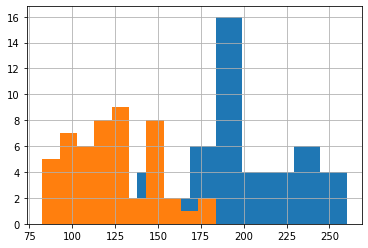

In [211]:
get_plot_and_stats('Sex','Best3SquatKg')

Full data histogram:


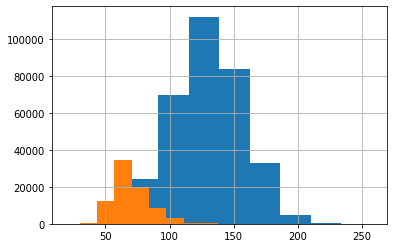

#####################################################

Category 0: ShapiroResult(statistic=0.9832483530044556, pvalue=0.6944859027862549)
Category 1: ShapiroResult(statistic=0.9721555709838867, pvalue=0.28262296319007874)
Ttest_indResult(statistic=-13.663019318678122, pvalue=2.001369025332864e-24)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986233555407977)

#####################################################
Sampled data histogram:


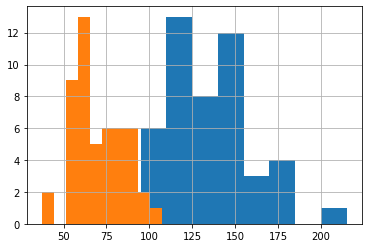

In [212]:
get_plot_and_stats('Sex','Best3BenchKg')

Full data histogram:


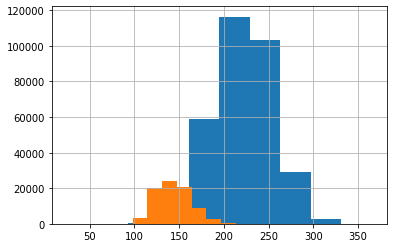

#####################################################

Category 0: ShapiroResult(statistic=0.9654586911201477, pvalue=0.15040531754493713)
Category 1: ShapiroResult(statistic=0.9646085500717163, pvalue=0.13861826062202454)
Ttest_indResult(statistic=-12.903065371944722, pvalue=7.504234259834983e-23)
MannwhitneyuResult(statistic=1250.0, pvalue=0.49862216180795066)

#####################################################
Sampled data histogram:


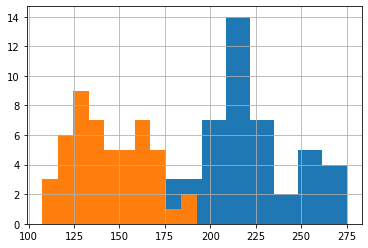

In [213]:
get_plot_and_stats('Sex','Best3DeadliftKg')

##### Hipótese 2

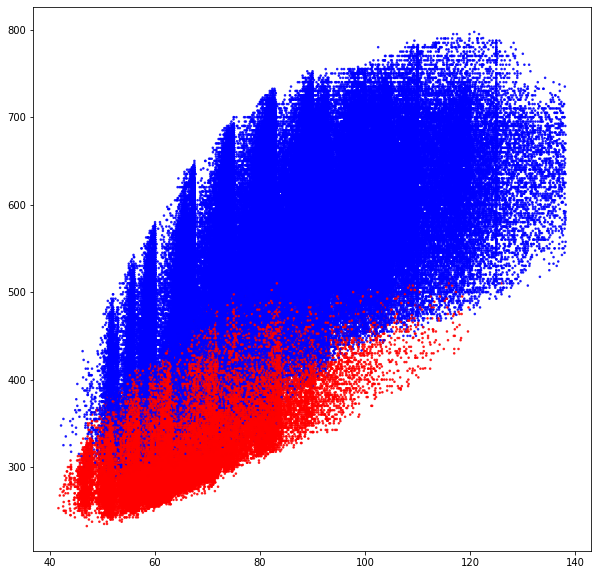

In [214]:
## peso total por peso corporal, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfclean['BodyweightKg'], dfclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfclean['Sex']])

Full data histogram:


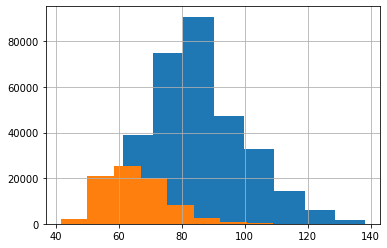

#####################################################

Category 0: ShapiroResult(statistic=0.9854845404624939, pvalue=0.7922267317771912)
Category 1: ShapiroResult(statistic=0.9426143169403076, pvalue=0.017117084935307503)
Ttest_indResult(statistic=-5.963017942840044, pvalue=3.923311395748455e-08)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986246452565667)

#####################################################
Sampled data histogram:


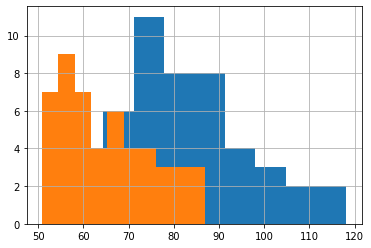

In [215]:
get_plot_and_stats('Sex','BodyweightKg')

##### Hipótese 3

Full data histogram:


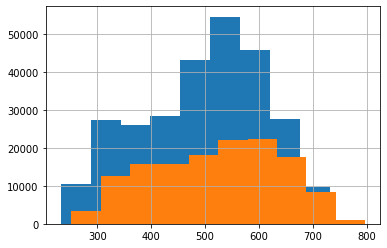

#####################################################

Category 0: ShapiroResult(statistic=0.9618159532546997, pvalue=0.1059209331870079)
Category 1: ShapiroResult(statistic=0.9539647698402405, pvalue=0.049748603254556656)
Ttest_indResult(statistic=3.0719029312086565, pvalue=0.0027535620897126824)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986244470746747)

#####################################################
Sampled data histogram:


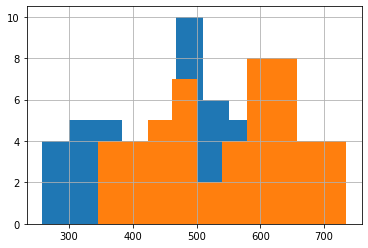

In [216]:
get_plot_and_stats('EquipmentC','TotalKg')

Full data histogram:


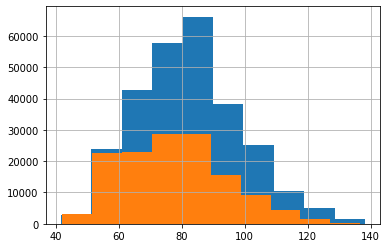

#####################################################

Category 0: ShapiroResult(statistic=0.9557051062583923, pvalue=0.05877859145402908)
Category 1: ShapiroResult(statistic=0.9343623518943787, pvalue=0.008112099021673203)
Ttest_indResult(statistic=-0.31993572054763886, pvalue=0.7496981509674907)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986246452565667)

#####################################################
Sampled data histogram:


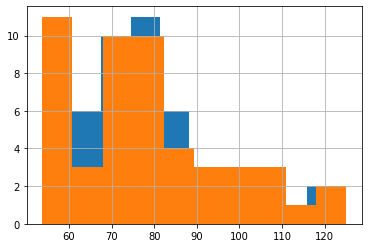

In [217]:
get_plot_and_stats('EquipmentC','BodyweightKg')

Full data histogram:


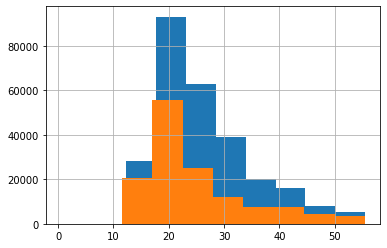

#####################################################

Category 0: ShapiroResult(statistic=0.8306667804718018, pvalue=4.8228662308247294e-06)
Category 1: ShapiroResult(statistic=0.7895272970199585, pvalue=5.072940894024214e-07)
Ttest_indResult(statistic=-2.373515187658612, pvalue=0.019569954746893586)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986230242596009)

#####################################################
Sampled data histogram:


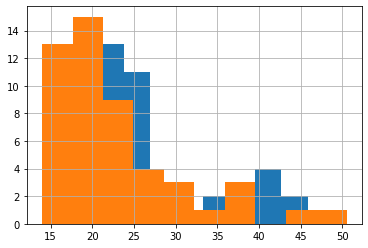

In [218]:
get_plot_and_stats('EquipmentC','Age')

Full data histogram:


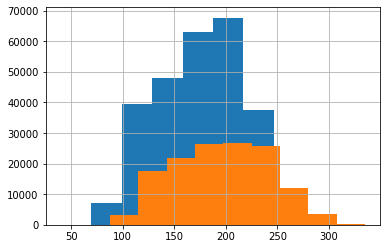

#####################################################

Category 0: ShapiroResult(statistic=0.9778304100036621, pvalue=0.46453484892845154)
Category 1: ShapiroResult(statistic=0.9682748317718506, pvalue=0.1967393457889557)
Ttest_indResult(statistic=4.335043830409788, pvalue=3.534758929885819e-05)
MannwhitneyuResult(statistic=1250.0, pvalue=0.49862315680077685)

#####################################################
Sampled data histogram:


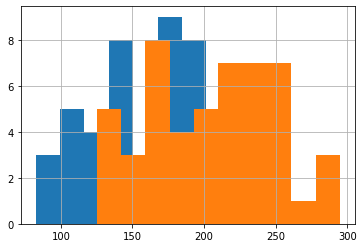

In [219]:
get_plot_and_stats('EquipmentC','Best3SquatKg')

Full data histogram:


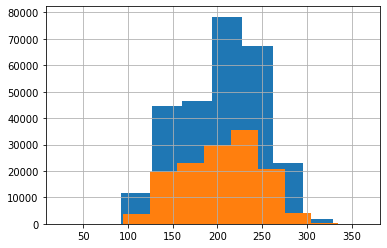

#####################################################

Category 0: ShapiroResult(statistic=0.9747704863548279, pvalue=0.35764992237091064)
Category 1: ShapiroResult(statistic=0.9503425359725952, pvalue=0.03523892164230347)
Ttest_indResult(statistic=1.8014947756939577, pvalue=0.07470001763103394)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986234879863431)

#####################################################
Sampled data histogram:


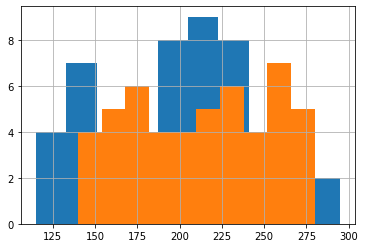

In [220]:
get_plot_and_stats('EquipmentC','Best3DeadliftKg')

Full data histogram:


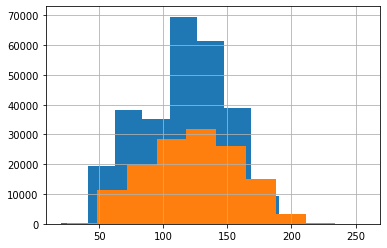

#####################################################

Category 0: ShapiroResult(statistic=0.949683427810669, pvalue=0.03310900181531906)
Category 1: ShapiroResult(statistic=0.9677312970161438, pvalue=0.18685325980186462)
Ttest_indResult(statistic=2.542641996427558, pvalue=0.01256727235886809)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986238189330343)

#####################################################
Sampled data histogram:


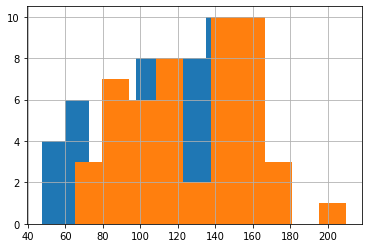

In [221]:
get_plot_and_stats('EquipmentC','Best3BenchKg')

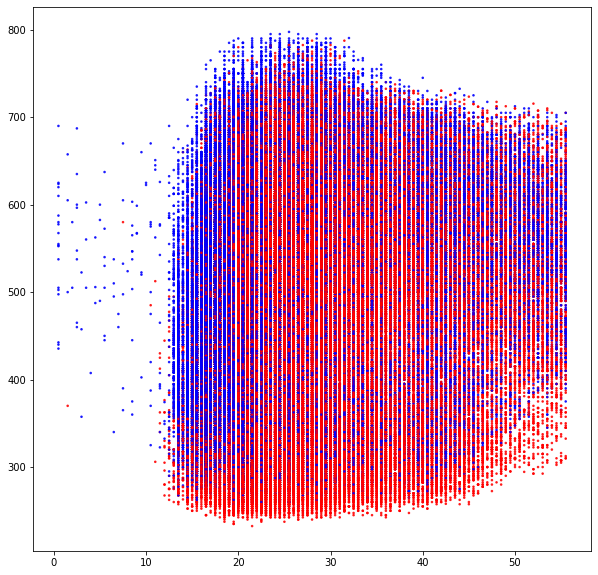

In [222]:
## peso total por idade, separado por equipamento
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfclean['Age'], dfclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfclean['EquipmentC']])

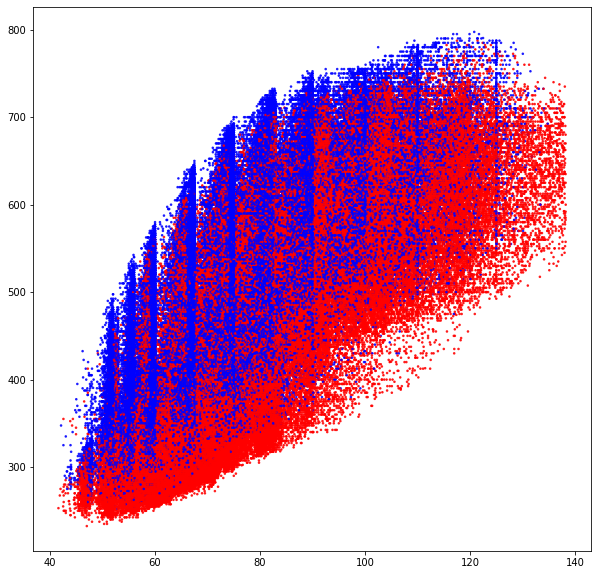

In [223]:
## peso total por peso corporal, separado por equipamento
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfclean['BodyweightKg'], dfclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfclean['EquipmentC']])

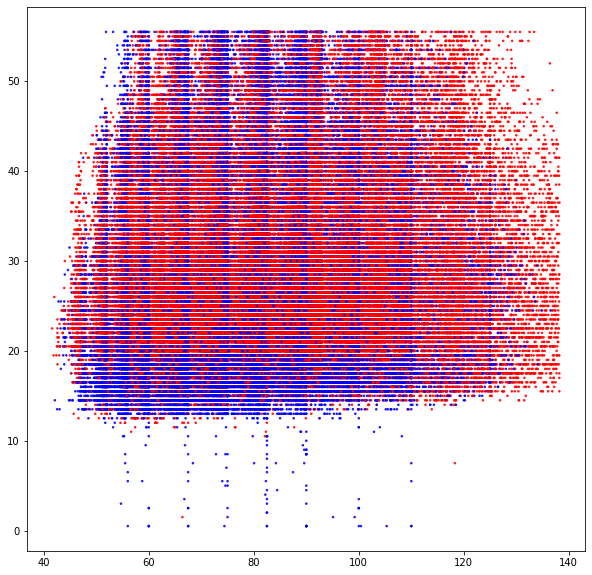

In [224]:
## peso total por peso corporal, separado por equipamento
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfclean['BodyweightKg'], dfclean['Age'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfclean['EquipmentC']])

##### Hipótese 4

In [225]:
dfclean['TestedC'].value_counts().index

Int64Index([0, -1], dtype='int64')

Full data histogram:


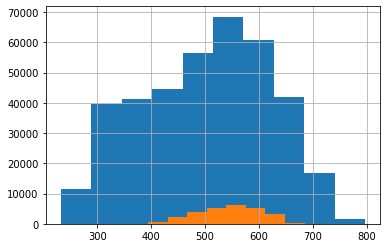

#####################################################

Category 0: ShapiroResult(statistic=0.9711748361587524, pvalue=0.2582058310508728)
Category 1: ShapiroResult(statistic=0.95475172996521, pvalue=0.05364172160625458)
Ttest_indResult(statistic=2.859359776096008, pvalue=0.005187032587139321)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986245461763288)

#####################################################
Sampled data histogram:


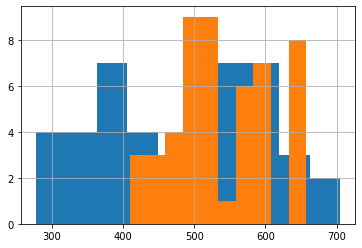

In [226]:
get_plot_and_stats('TestedC','TotalKg')

Full data histogram:


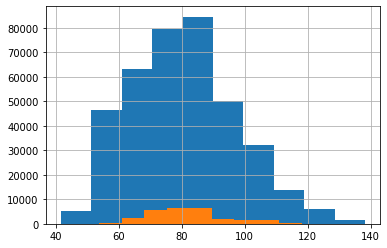

#####################################################

Category 0: ShapiroResult(statistic=0.9769571423530579, pvalue=0.431951642036438)
Category 1: ShapiroResult(statistic=0.9721629023551941, pvalue=0.28281369805336)
Ttest_indResult(statistic=1.9635316708912416, pvalue=0.052418319812924406)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986246452565667)

#####################################################
Sampled data histogram:


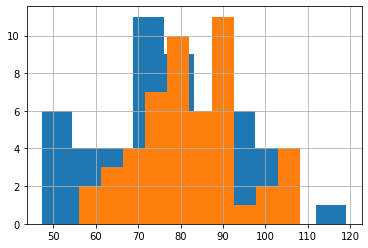

In [227]:
get_plot_and_stats('TestedC','BodyweightKg')

Full data histogram:


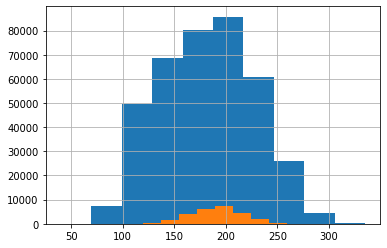

#####################################################

Category 0: ShapiroResult(statistic=0.9755086302757263, pvalue=0.381545752286911)
Category 1: ShapiroResult(statistic=0.9592880010604858, pvalue=0.08299128711223602)
Ttest_indResult(statistic=1.6318887047874389, pvalue=0.1059123511077401)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986240173865085)

#####################################################
Sampled data histogram:


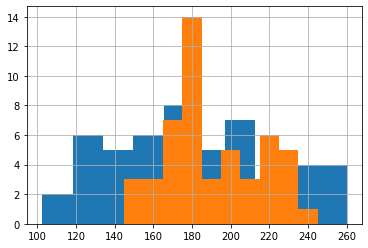

In [228]:
get_plot_and_stats('TestedC','Best3SquatKg')

Full data histogram:


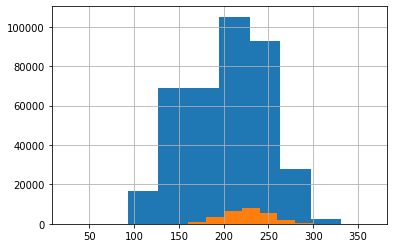

#####################################################

Category 0: ShapiroResult(statistic=0.9637285470962524, pvalue=0.12736625969409943)
Category 1: ShapiroResult(statistic=0.9793801307678223, pvalue=0.526124894618988)
Ttest_indResult(statistic=3.0918748836981123, pvalue=0.002590381213864133)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986240173865085)

#####################################################
Sampled data histogram:


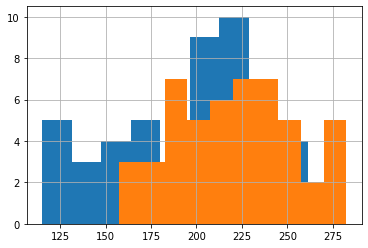

In [229]:
get_plot_and_stats('TestedC','Best3DeadliftKg')

Full data histogram:


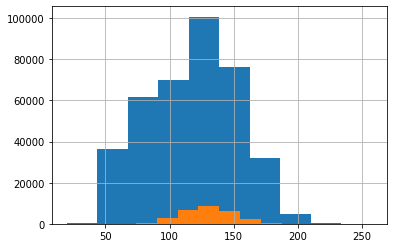

#####################################################

Category 0: ShapiroResult(statistic=0.9763944149017334, pvalue=0.4118204116821289)
Category 1: ShapiroResult(statistic=0.9799135327339172, pvalue=0.548321008682251)
Ttest_indResult(statistic=3.4173147176399117, pvalue=0.0009223040011322095)
MannwhitneyuResult(statistic=1250.0, pvalue=0.498623918170504)

#####################################################
Sampled data histogram:


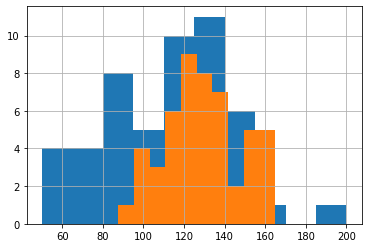

In [230]:
get_plot_and_stats('TestedC','Best3BenchKg')

Full data histogram:


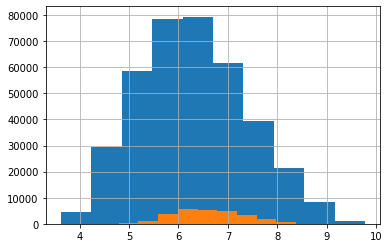

#####################################################

Category 0: ShapiroResult(statistic=0.9830634593963623, pvalue=0.6862316727638245)
Category 1: ShapiroResult(statistic=0.9611780643463135, pvalue=0.09959693998098373)
Ttest_indResult(statistic=1.101508211712121, pvalue=0.2733735510739824)
MannwhitneyuResult(statistic=1250.0, pvalue=0.4986246452565667)

#####################################################
Sampled data histogram:


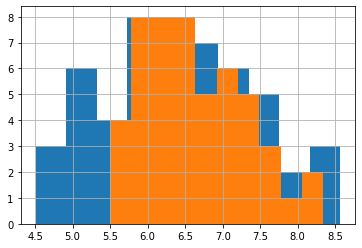

In [231]:
get_plot_and_stats('TestedC','total_bodyweight')